# Lab 1 - On Fourier series

Welcome to your first Digital Signal and Image Processing lab. The goal is to familiarize with a few Python concepts needed to manipulate signals. For Python tutorials check the follwing links:
<ul>
<li><a href="http://docs.python-guide.org/en/latest/">Hitchhiker’s Guide to Python</a></li>
<li><a href="http://docs.scipy.org/doc/scipy/reference/tutorial/index.html">Scipy tutorial</a></li>
<li><a href="https://docs.python.org/2/tutorial/">The official Python tutorial</a> (NERD alert!)</li>
</ul>

Let's get it started!

Modules are one of the things that make Python (one of) the best languages for data analysis. In the following sections we will see the most useful modules for our purposes.

## Numpy

In [1]:
import numpy as np

With NumPy we can also easily calculate scalar products between vectors.

In [2]:
x = [2,2]
print(x)

[2, 2]


In [3]:
alpha = 2
x_new = alpha*x
print(x_new)

[2, 2, 2, 2]


In [4]:
print(np.dot(x,x))

8


## Matplotlib

Another aspect that makes Python so versatile is that we can easily visualize basically every 1D/2D signal. To do that we need another module: <a href="http://matplotlib.org/"><font face="TrueType">Matplotlib</font></a>.

Let's try to plot our first signal.

In [5]:
import matplotlib.pyplot as plt

# magic command, it make the image appear immediately below its creation
%matplotlib inline 

# ----- optional commands to simply make a larger figure ---- #
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
# ----------------------------------------------------------- #

### Let's choose the sampling values 

In [6]:
### one point every 0.00001

x = np.arange(0, 2*np.pi, 0.00001)

## Manipulating signals

We will now start generating signals defined over $[0, 2pi]$.

### Ramp

In [7]:
### COMPLETE HERE
### Define the function ramp as a linear function of x. a is the rate and b is the offset at the origin

def ramp(x, a, b):
    return a*x+b

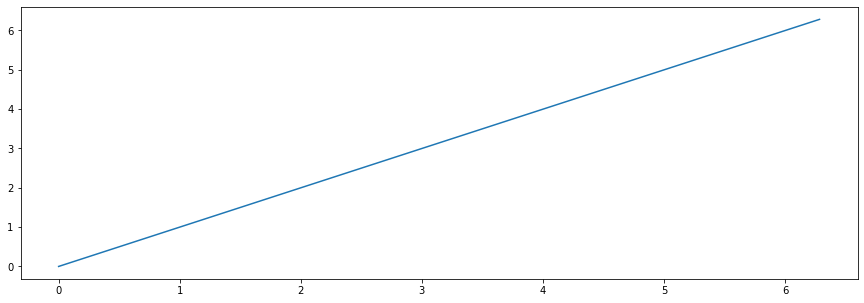

In [8]:
plt.plot(x, ramp(x,1,0))

### Harmonics (sines and cosines)

Let's plot the first 4 harmonics. 

Text(0, 0.5, 'sin(x)')

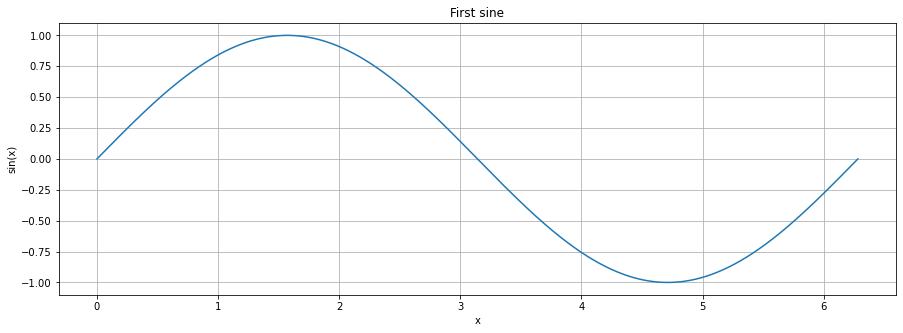

In [9]:
## FIRST SINE
plt.plot(x, np.sin(x))
plt.grid()
plt.xlabel('x')
plt.title('First sine')
plt.ylabel('sin(x)')

Text(0, 0.5, 'sin(2x)')

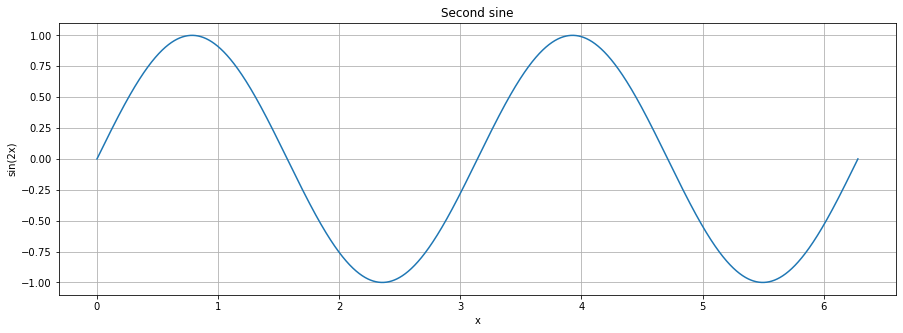

In [10]:
## SECOND SINE
plt.plot(x, np.sin(2*x))
plt.grid()
plt.xlabel('x')
plt.title('Second sine')
plt.ylabel('sin(2x)')

Text(0, 0.5, 'sin(3x)')

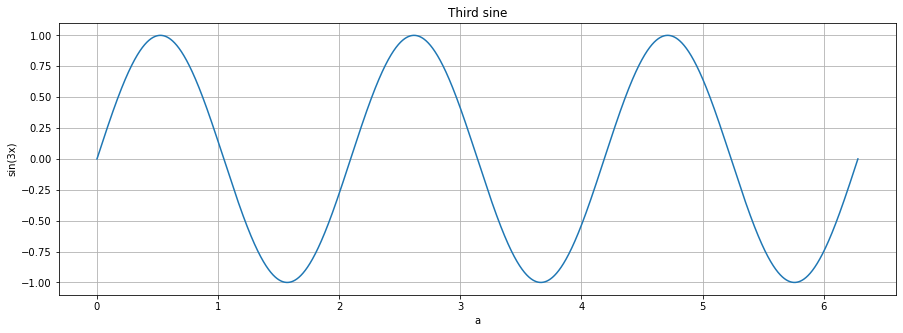

In [11]:
## THIRD SINE - COMPLETE HERE
plt.plot(x, np.sin(3*x) )
plt.grid()
plt.xlabel('a')
plt.title('Third sine')
plt.ylabel('sin(3x)')

Text(0, 0.5, '...')

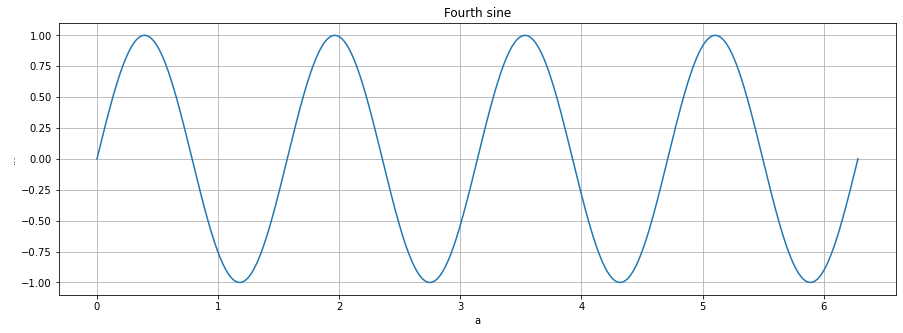

In [12]:
## FOURTH SINE - COMPLETE HERE
plt.plot(x, np.sin(4*x) )
plt.grid()
plt.xlabel('a')
plt.title('Fourth sine')
plt.ylabel('...')

Now let's do the same thing with cosines.

Text(0, 0.5, 'cos(x)')

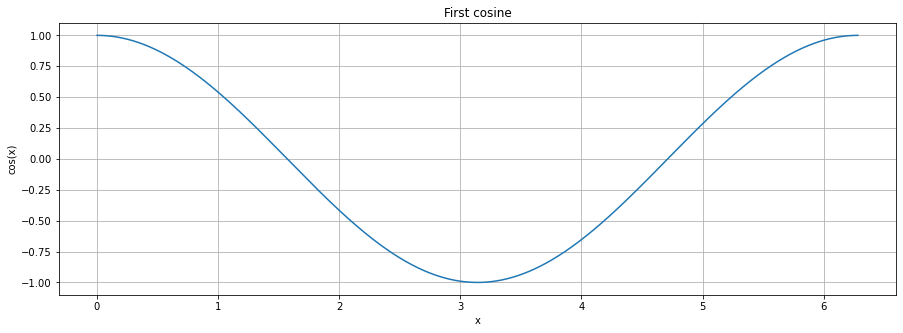

In [13]:
## FIRST COSINE
plt.plot(x, np.cos(x))
plt.grid()
plt.xlabel('x')
plt.title('First cosine')
plt.ylabel('cos(x)')

Text(0, 0.5, 'cos(2x)')

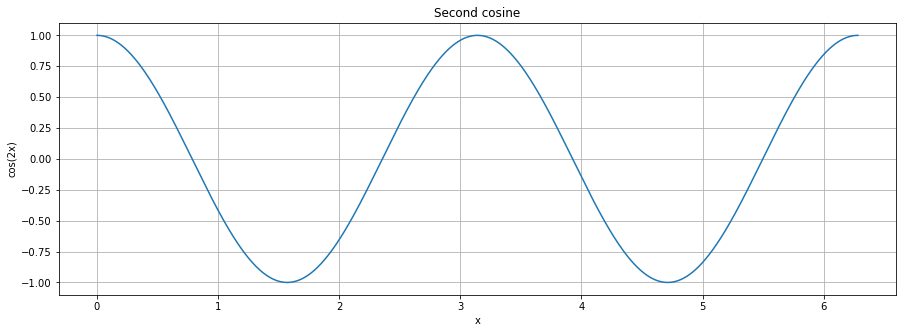

In [14]:
## SECOND COSINE
plt.plot(x, np.cos(2*x))
plt.grid()
plt.xlabel('x')
plt.title('Second cosine')
plt.ylabel('cos(2x)')

Text(0, 0.5, 'cos(3x)')

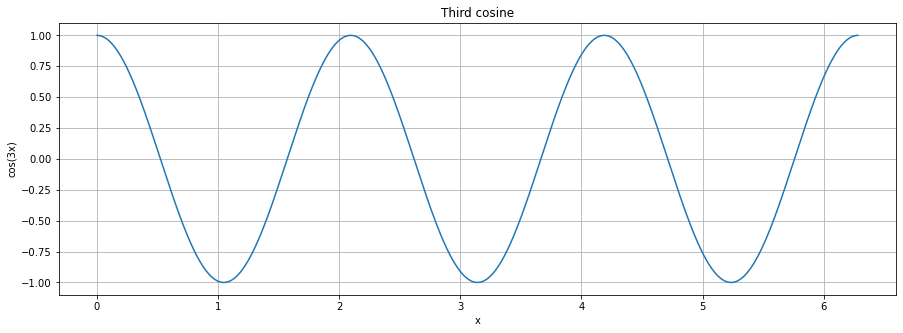

In [15]:
## THIRD COSINE - COMPLETE HERE
plt.plot(x, np.cos(3*x))
plt.grid()
plt.xlabel('x')
plt.title('Third cosine')
plt.ylabel('cos(3x)')

Text(0, 0.5, 'cos(4x)')

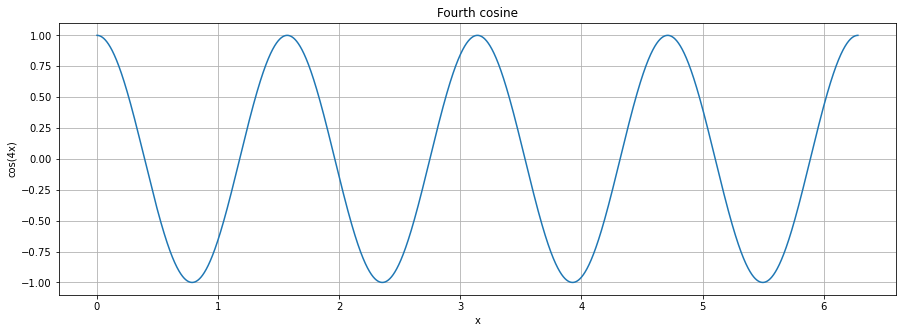

In [16]:
## FOURTH COSINE - COMPLETE HERE
plt.plot(x, np.cos(4*x))
plt.grid()
plt.xlabel('x')
plt.title('Fourth cosine')
plt.ylabel('cos(4x)')

Sometimes you need more than one signal in a single plot. You can easily do it just like that.

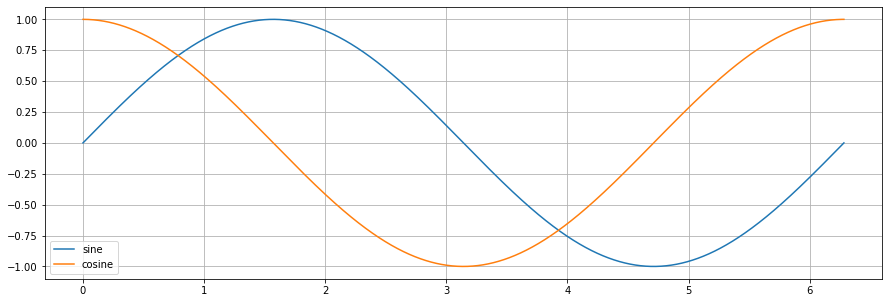

In [17]:
plt.plot(x, np.sin(x), label='sine')
plt.plot(x, np.cos(x), label='cosine')
plt.legend()
plt.grid()

If you want to split the figure in several subfigures, you just need to use the following command.

(-1.2, 1.2)

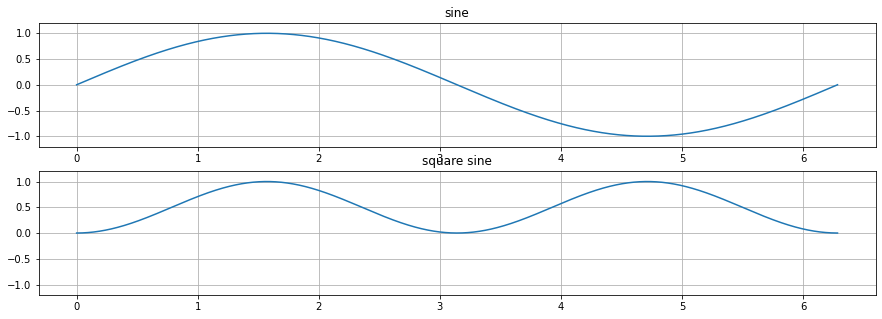

In [18]:
plt.subplot(2,1,1) # 2 rows, 1 column, write in position 1
plt.plot(x, np.sin(x))
plt.title('sine')
plt.grid()
plt.ylim([-1.2,1.2]) # different scales on one of the axis may be misleading

plt.subplot(2,1,2) # 2 rows, 1 column, write in position 2
plt.plot(x, np.sin(x)**2) # square sine
plt.title('square sine')
plt.grid()
plt.ylim([-1.2,1.2])

### Triangle

Let's use the Scipy function Sawtooth

In [19]:
from scipy.signal import sawtooth

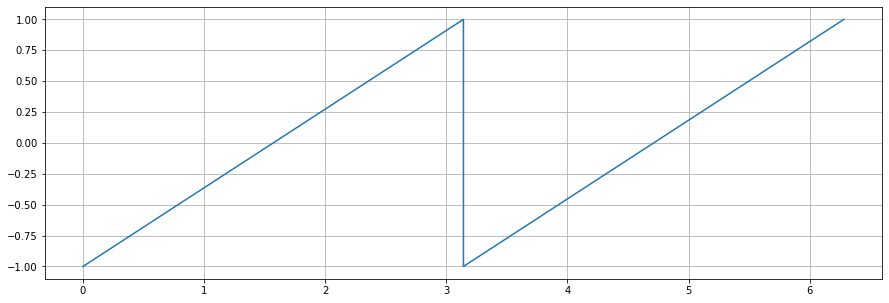

In [20]:
## set width = 0.5
plt.plot(x, sawtooth(2*x,1))
plt.grid()

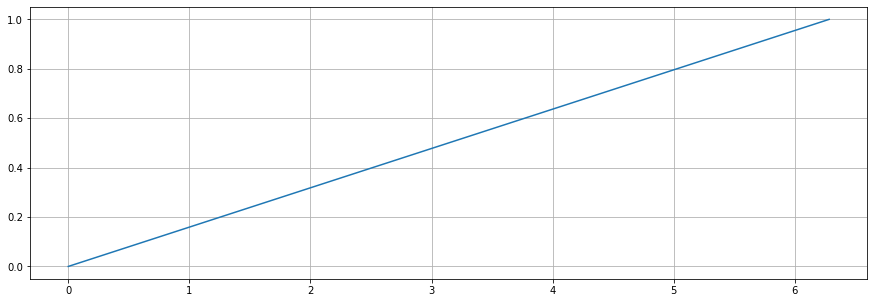

In [21]:
### COMPLETE HERE
plt.plot(x, (sawtooth(x,1)  +1 ) *0.5 )
plt.grid()
### make sure that the triangle wave ranges from 0 to 1 on the interval [0,2pi]
for y in ( sawtooth(x,1)  +1 ) * 0.5 :
    assert(y<=1 and y>=0)
     

### Square 

Similarly, we will use the SciPy function Square

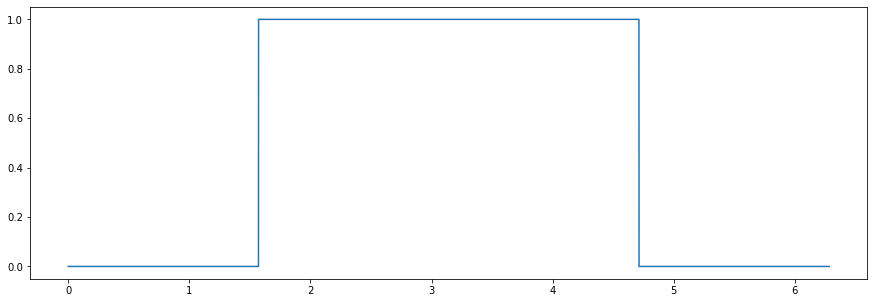

In [22]:
from scipy.signal import square
##square??

plt.plot(x, 0.5*square(x-np.pi/2,0.5)+0.5)

## Fourier series

We will now compute the Fourier series coefficients and reconstruct the signal with the Fourier series. 

We are <b> assuming </b> that the function is always defined over $[0,2pi]$. 

To write the function, *carefully read the class notes*.

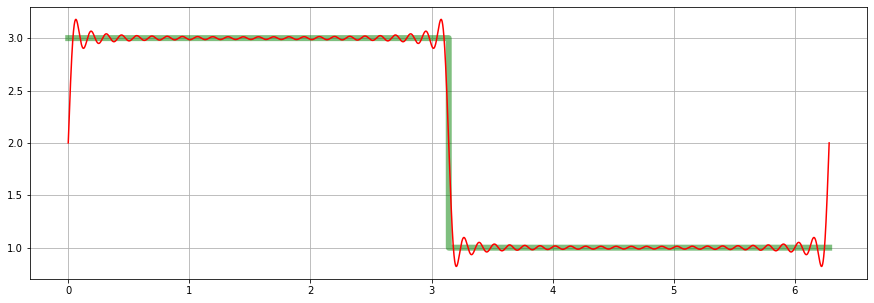

In [183]:
def fseries(x, signal,K):  ### COMPLETE HERE
  
    ## reconstructed signal
    xr = np.zeros(len(x))
    
    ### a_0 coefficient
    ## scaling factor
    c = 2*np.pi / (len(signal))
    a_0 = np.sum(signal) * (1/len(signal)) ## average of the signal over the range    
    
    ## Fourier coefficients arrays
    a =  np.zeros(len(x))  
    b =  np.zeros(len(x)) 
    
    
    for k in range(1,K+1):
        
        ## evaluates coefficients
        a[k] = ( np.dot(signal , np.cos( k * x) ) ) * c * (1/np.pi) # equal to multiply by 2 !
        b[k] = ( np.dot(signal , np.sin( k * x) ) ) * c * (1/np.pi)
    
    ## computes series
   
    series =  (  sum( [ a[k]*np.cos(k*x) + b[k]*np.sin(k*x) for k in range(1,K+1)])   ) 
    series += a_0 * 2 / 2 
    return series, a_0, a, b


#little test
f = 1/2*(square(x-np.pi/2,1/256)+1)*16
f = square(x) + 2
k = 50
f_approx, a0, a, b  = fseries(x,f,k)
plt.plot(x, f,"g", linewidth=6, alpha=0.5 )
plt.grid()
plt.plot(x, f_approx,'r' )

plt.show()

## The approximation issue

Now you should define a function that, given a tolerance *tol*, approximates a given function *f* with *k* out of *K* components of the series.

The approximation criterion is defined as the difference between the norm of *f* and the finite approximation (Parseval).

In [175]:
### COMPLETE HERE

def look_for_best_k_and_plot(x, signal, K, tol, min=1):

    # grid scaling for plot
    major_ticks = np.arange(0, 2*np.pi+1, np.pi/2 )
    minor_ticks = np.arange(0, 2*np.pi+1, np.pi * 0.1 )
    fig = plt.figure()

    # nice plot settings
    ax = fig.add_subplot(1,1,1)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)  
    ax.plot( x,signal,linewidth=6,alpha=0.3, label="signal" ) 
    ax.legend()
    ## compute function norm keeping into account the scaling factor
    c = 2*np.pi / len(x)           ##(b-a)/n
    norm = np.dot(signal,signal) * c 

    for k in range(min,K+1):
        reconstructed_signal, a_0, a, b = fseries(x,signal,k)

        ## Parseval 
        approx_norm = np.dot(reconstructed_signal,reconstructed_signal)  * c    ### check class notes!
        delta =  norm - approx_norm
     
        if (delta <= tol): break  

       

    print('the number of used harmonics is %d' % k)

    ax.plot(x, reconstructed_signal, label='k = {}'.format(k)  )
    ax.legend()
    plt.show()
    return delta

the number of used harmonics is 1


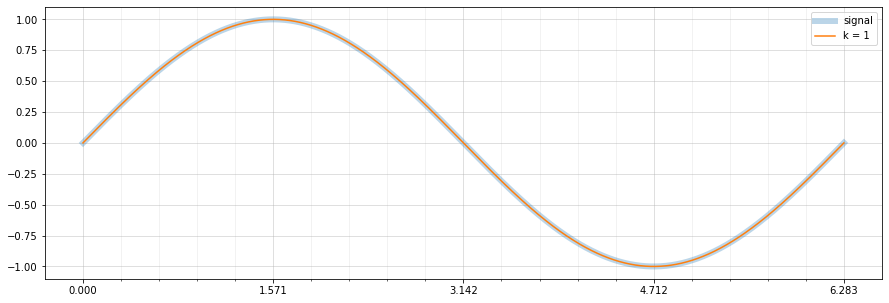

4.692811653494999e-06

In [176]:
## CASE 1: SINE FUNCTION

signal = np.sin(x)
look_for_best_k_and_plot(x, signal, 10, 10e-3)


the number of used harmonics is 15


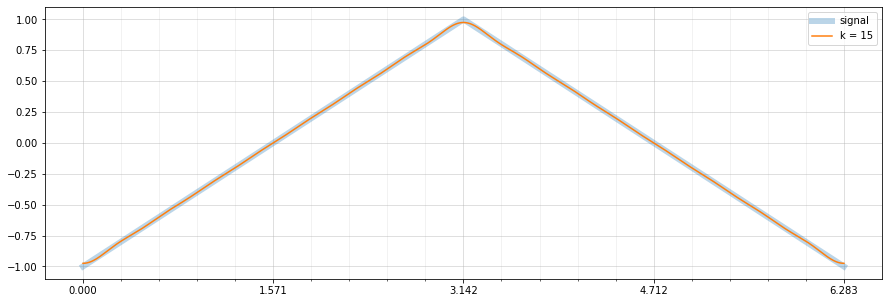

7.755526607233776e-05

In [184]:
## CASE 2: TRIANGULAR FUNCTION

signal = sawtooth(x,0.5)
look_for_best_k_and_plot(x, signal,20, 10e-5)

the number of used harmonics is 63


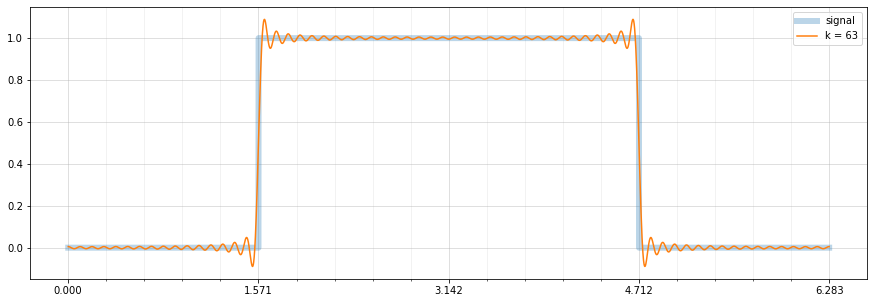

0.009951044782666951


In [185]:
## CASE 3: SQUARE FUNCTION  

## 3a 
signal = 1/2*(square(x-np.pi/2,0.5)+1)

delta = look_for_best_k_and_plot(x, signal, 100, 10e-3, 60)
print(delta)



In [ ]:
# ## 3b 
plt.figure()
signal = 1/2*(square(x-np.pi/2,1/64)+1)*8

# ### COMPLETE HERE
delta = look_for_best_k_and_plot(x, signal, 800, 10e-3,800)

print(delta)


In [ ]:
## 3c
plt.figure()
signal = 1/2*(square(x-np.pi/2,1/256)+1)*16
### COMPLETE HERE
delta = look_for_best_k_and_plot(x, signal, 1000, 10e-3,1000)
print(delta)

### Gibbs phenomenon

Using one of the square waves above, plot the approximation for different values of k ([10,30,80,200]). Observe what happens at the discontinuities.

The ripples next to the discontinuities are due to the <a href="https://en.wikipedia.org/wiki/Gibbs_phenomenon"> Gibbs phenomenon</a>. From this example we can sense that, in order to represent signals with strong discontinuities, we need high frequency components. This is a well-known effect that is widely used in image processing (e.g. edge detection).

0


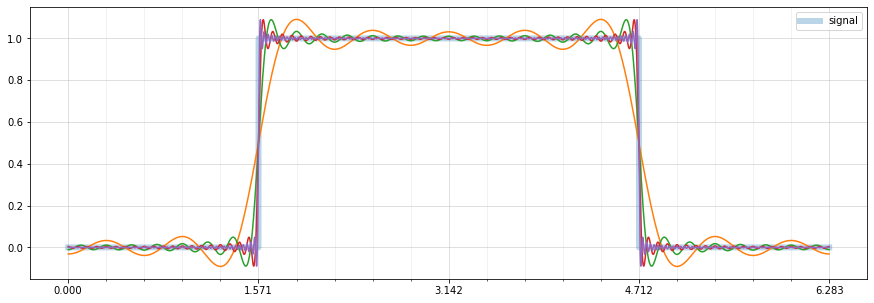

In [201]:
#k
k_list = [10, 30, 80, 200]

#signal
signal = 1/2*(square(x-np.pi/2,0.5)+1)
print(delta)

# grid scaling for plot
major_ticks = np.arange(0, 2*np.pi+1, np.pi/2 )
minor_ticks = np.arange(0, 2*np.pi+1, np.pi * 0.1 )
fig = plt.figure()

# nice plot settings
ax = fig.add_subplot(1,1,1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)  
ax.plot( x,signal,linewidth=6,alpha=0.3, label="signal" ) 
ax.legend()

for k in k_list:
    result =  fseries(x,signal, k)
    ax.plot(x,result[0])  


No handles with labels found to put in legend.


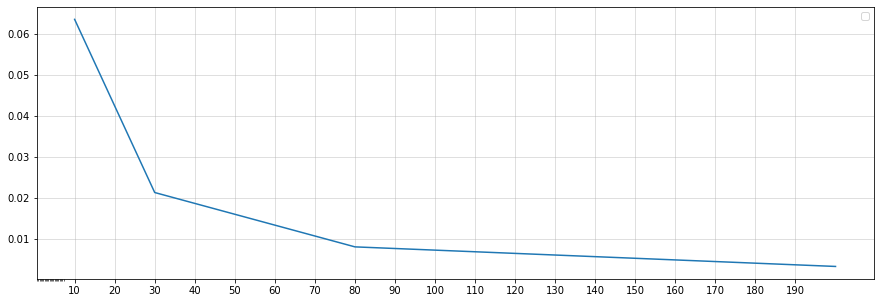

In [213]:
# Let's see how slow the error converges to f when Gibbs phenomenon is around
# Andres -

def look_for_best_k(x, signal, K, tol, min=1):   
    c = 2*np.pi / len(x)     
    norm = np.dot(signal,signal) * c 
    reconstructed_signal, a_0, a, b = fseries(x,signal,k)
    approx_norm = np.dot(reconstructed_signal,reconstructed_signal)  * c    ### check class notes!
    delta =  norm - approx_norm
    return delta


results = []
for k in k_list:
    results.append(look_for_best_k(x, signal, k, 10e-3,k))

# grid scaling for plot
major_ticks = np.arange(0, k_list[-1], 10 )
#minor_ticks = k_list/10
fig = plt.figure()

# nice plot settings
ax = fig.add_subplot(1,1,1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
#ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)  
ax.legend()

ax.plot( k_list, results )